In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten, Dropout

data = np.load('./processed-data/data.npy')
labels = np.load('./processed-data/labels.npy')

In [8]:
model = Sequential()

model.add(Conv2D(200, (5, 5), input_shape=(224, 224, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(100, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [9]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

train_data, test_data, train_label, test_label = train_test_split(data, labels, test_size=0.1)

In [10]:
fitted_model = model.fit(train_data, train_label, epochs=20, validation_split=0.2)

Epoch 1/20
148/148 [==============================] - 495s 3s/step - loss: 0.6157 - accuracy: 0.6909 - val_loss: 0.5034 - val_accuracy: 0.7836
Epoch 2/20
148/148 [==============================] - 513s 3s/step - loss: 0.5018 - accuracy: 0.7702 - val_loss: 0.4361 - val_accuracy: 0.7997
Epoch 3/20
148/148 [==============================] - 465s 3s/step - loss: 0.4261 - accuracy: 0.8116 - val_loss: 0.4079 - val_accuracy: 0.8318
Epoch 4/20
148/148 [==============================] - 444s 3s/step - loss: 0.3689 - accuracy: 0.8419 - val_loss: 0.4096 - val_accuracy: 0.8259
Epoch 5/20
148/148 [==============================] - 432s 3s/step - loss: 0.3550 - accuracy: 0.8436 - val_loss: 0.3731 - val_accuracy: 0.8284
Epoch 6/20
148/148 [==============================] - 442s 3s/step - loss: 0.2983 - accuracy: 0.8746 - val_loss: 0.3431 - val_accuracy: 0.8571
Epoch 7/20
148/148 [==============================] - 425s 3s/step - loss: 0.2682 - accuracy: 0.8848 - val_loss: 0.3306 - val_accuracy: 0.8656

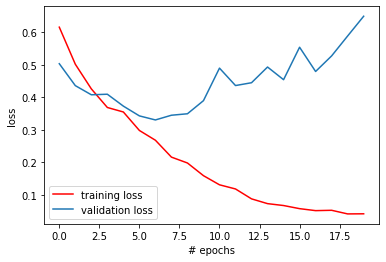

In [11]:
plt.plot(fitted_model.history['loss'], 'r', label='training loss')
plt.plot(fitted_model.history['val_loss'], label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

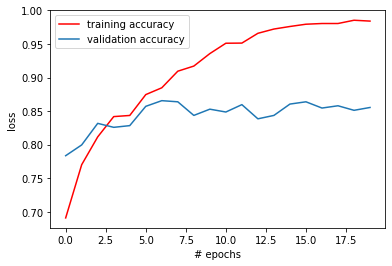

In [12]:

plt.plot(fitted_model.history['accuracy'],'r',label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
print(model.evaluate(test_data, test_label))

21/21 [==============================] - 30s 1s/step - loss: 0.7723 - accuracy: 0.8615
[0.7722831964492798, 0.8614916205406189]


In [15]:
model.save('face-mask-detector.h5')